# Lets Grow More

## Author :- Akhilesh Murugkar

## Task 2:- Prediction using Decision Tree  Algorithm

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Dropping unnecessary 'ID' coulmn

In [5]:
df_New=df.drop('Id',axis=1)

In [6]:
df_New.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df_New.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exploring Correlation between SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm

In [8]:
df_New.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


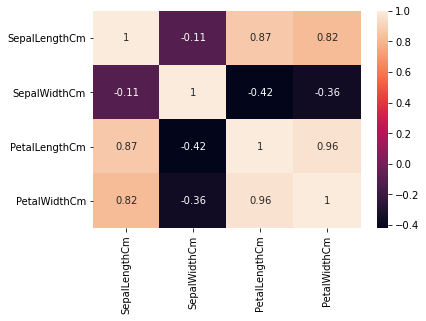

In [9]:
sns.heatmap(df_New.corr(),annot=True)

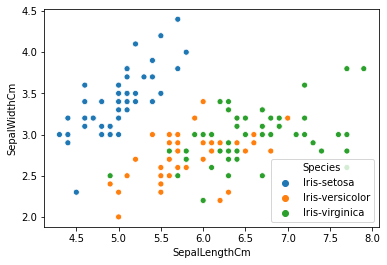

In [10]:
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=df['Species'])

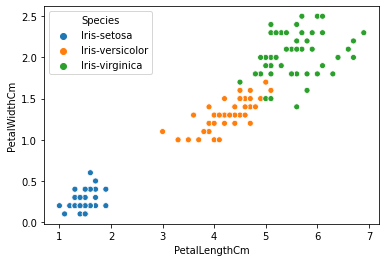

In [11]:
sns.scatterplot(df['PetalLengthCm'],df['PetalWidthCm'],hue=df['Species'])

From Above two graph we can say that classification can be done more accuratly with help of PetalLengthCm and PetalWidthCm than SepalLengthCm and SepalWidthCm

## Seperating Dependent and independent Variables

In [12]:
X=df_New.iloc[:,:4]

In [13]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
Y=df_New.iloc[:,4:5]

In [15]:
Y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## Scaling the Data

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
86,1.038005,0.106445,0.535296,0.396172
68,0.432165,-1.976181,0.421564,0.396172
128,0.674501,-0.587764,1.047087,1.185010
54,0.795669,-0.587764,0.478430,0.396172
56,0.553333,0.569251,0.535296,0.527645


## Splitting data into Train and Test data

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

## Creating Decision Tree Classifier Model

In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

## Fitting the model on train data

In [19]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Predicting the Score of the model on Test Data

In [20]:
model.score(X_test,y_test)

0.9555555555555556

In [21]:
y_pre=model.predict(X_test)

## Visualizing Confusion Matrix for test Data

In [22]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_test, y_pre)

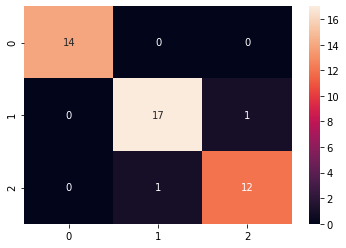

In [23]:
sns.heatmap(cnf,annot=True)

## Visualizing Decision Tree Classifier using plot_tree function

[Text(390.6, 498.3, 'X[2] <= 2.45\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(312.48, 407.70000000000005, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(468.72, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(312.48, 317.1, 'X[2] <= 5.05\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(234.36, 226.5, 'X[0] <= 4.95\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]'),
 Text(156.24, 135.89999999999998, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(78.12, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(234.36, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(312.48, 135.89999999999998, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(390.6, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(624.96, 317.1, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(546.84, 226.5, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nval

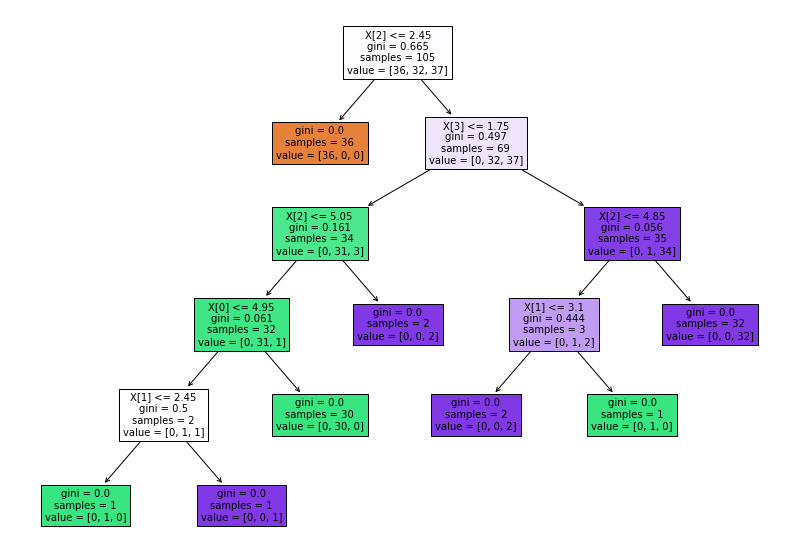

In [24]:
plt.figure(figsize=(14, 10))
tree.plot_tree(model, filled=True, fontsize=10)